# Практика 4.2 Предварительная обработка данных

## Установка sklearn

In [17]:
!pip install scikit-learn

## Загрузка данных

Ресурсы с открытыми наборами данных:

* https://archive.ics.uci.edu/
* https://www.kaggle.com
* https://github.com/awesomedata/awesome-public-datasets
* https://data.gov/
* https://ec.europa.eu/eurostat/web/main/home
* https://www.earthdata.nasa.gov/

Источник: 

https://www.kaggle.com/datasets/hydramst/cars-moldova/data

Описание: набор данных с описание автомобилей и их стоимостью

Целевая переменная: Цена автомобиля (Price(euro))

Признаки:
*   Make                    - марка <br>
*   Model                   - модель<br>
*   Year                    - год производства<br>
*   Style                   - тип кузова<br>
*   Distance                - пробег<br>
*   Engine_capacity(cm3)    - рабочий объём двигателя (см3)<br>
*   Тип топлива             - тип топлива <br>
*   Transmission            - Коробка передач<br>
*   Price(euro)             - цена (евро)*

In [18]:
import pandas as pd

df = pd.read_csv(r"data/2cars_moldova_nan.csv")

# Предварительный анализ данных

In [19]:
# Посмотрим на столбцы и типы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41006 non-null  object 
 1   Model                 41003 non-null  object 
 2   Year                  41004 non-null  float64
 3   Style                 41001 non-null  object 
 4   Distance              41003 non-null  float64
 5   Engine_capacity(cm3)  41004 non-null  float64
 6   Fuel_type             41004 non-null  object 
 7   Transmission          41004 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


In [20]:
df.shape

(41007, 9)

In [21]:
df.columns

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')

# Проверка на дубликаты

In [22]:
df.duplicated().sum()

np.int64(3732)

In [23]:
# удалим дубликаты
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [24]:
# проверим ещё раз
print(df.duplicated().sum())

0


In [25]:
# ознакомимся с данные
df.sample(3)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
34070,Lexus,NX Series,2017.0,Crossover,29000.0,1998.0,Petrol,Automatic,25000.0
939,Renault,Kadjar,2017.0,Crossover,162000.0,1496.0,Diesel,Automatic,12900.0
23153,Renault,Megane,2017.0,Universal,109000.0,1461.0,Diesel,Automatic,12999.0


# Разделим датасет на числовые и категориальные данные


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37275 entries, 0 to 37274
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37274 non-null  object 
 1   Model                 37271 non-null  object 
 2   Year                  37272 non-null  float64
 3   Style                 37269 non-null  object 
 4   Distance              37271 non-null  float64
 5   Engine_capacity(cm3)  37272 non-null  float64
 6   Fuel_type             37272 non-null  object 
 7   Transmission          37272 non-null  object 
 8   Price(euro)           37275 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.6+ MB


In [27]:
df.index

RangeIndex(start=0, stop=37275, step=1)

In [28]:
# сохраним список названий категориальных и числовых признаков в отдельные переменные
cat_df_cols = df.select_dtypes("object").columns
num_df_cols = df.select_dtypes("float64").columns

In [29]:
# посмотрим на результат
print(f"Размер данных для числовых признаков: {df[num_df_cols].shape}")
print(f"Размер данных для категориальных признаков: {df[cat_df_cols].shape}")
print("Числовые признаки:")
print(df[num_df_cols].sample(4))
print("Категориальные признаки:")
print(df[cat_df_cols].sample(4))

Размер данных для числовых признаков: (37275, 4)
Размер данных для категориальных признаков: (37275, 5)
Числовые признаки:
         Year  Distance  Engine_capacity(cm3)  Price(euro)
6630   2009.0  258000.0                1200.0       2899.0
4858   2007.0  121000.0                2000.0       5800.0
37018  2003.0   98940.0                1451.0       1100.0
12665  2012.0  161963.0                1400.0       9299.0
Категориальные признаки:
         Make    Model      Style Fuel_type Transmission
24713   Skoda  Octavia  Universal    Diesel    Automatic
11893   Honda     CR-Z  Hatchback    Hybrid       Manual
9805    Skoda    Fabia  Hatchback    Petrol    Automatic
31912  Toyota  Avensis  Universal    Diesel       Manual


# Работа с числовыми признаками

## Анализ данных по распределению

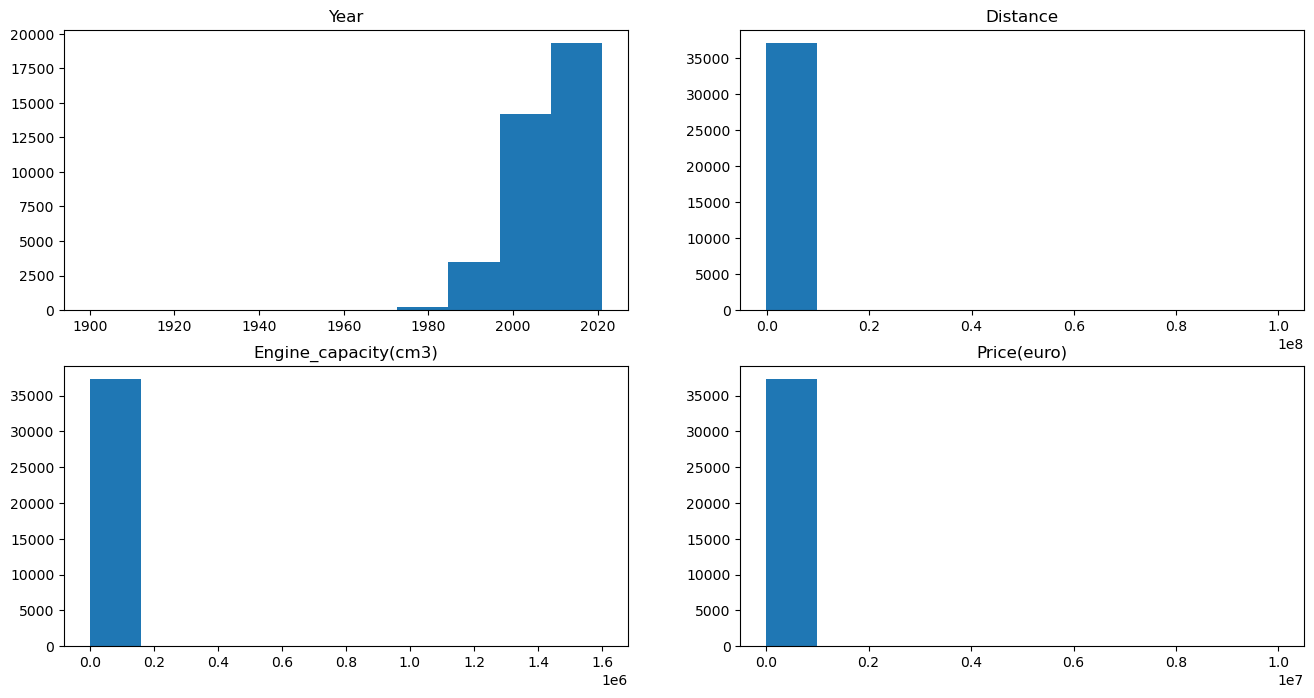

In [30]:
import matplotlib.pyplot as plt
import numpy as np

num_columns = df[num_df_cols].columns
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    plt.hist(x=df[column_name])
    plt.title(column_name)

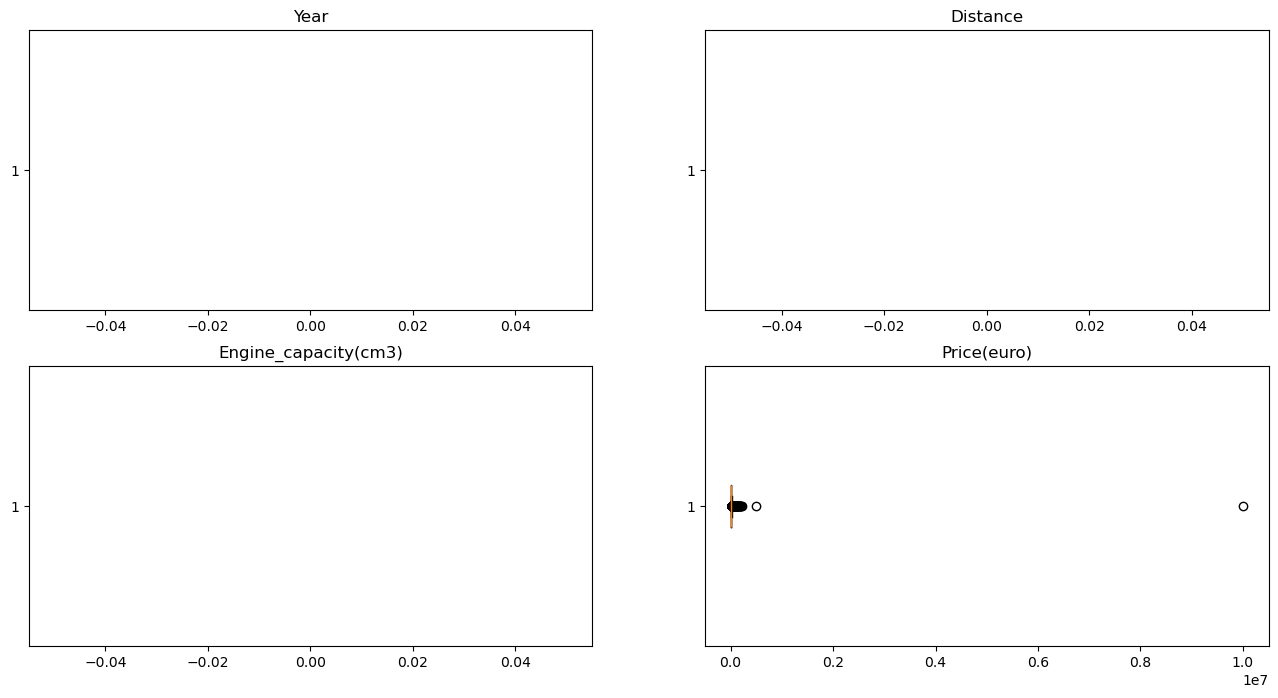

In [31]:
import matplotlib.pyplot as plt
import numpy as np

num_columns = df[num_df_cols].columns
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    plt.boxplot(x=df[column_name], vert=False)
    plt.title(column_name)


In [32]:
df[num_df_cols].describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,37272.000000,3.727100e+04,3.727200e+04,3.727500e+04
mean,2007.709165,4.778988e+05,1.901892e+03,9.568468e+03
std,8.294733,4.604838e+06,8.308165e+03,5.282544e+04
min,1900.000000,-2.050000e+05,0.000000e+00,1.000000e+00
25%,2004.000000,9.000000e+04,1.499000e+03,3.300000e+03
50%,2009.000000,1.700000e+05,1.800000e+03,6.490000e+03
75%,2014.000000,2.300000e+05,2.000000e+03,1.179900e+04
max,2021.000000,1.000000e+08,1.600000e+06,1.000000e+07


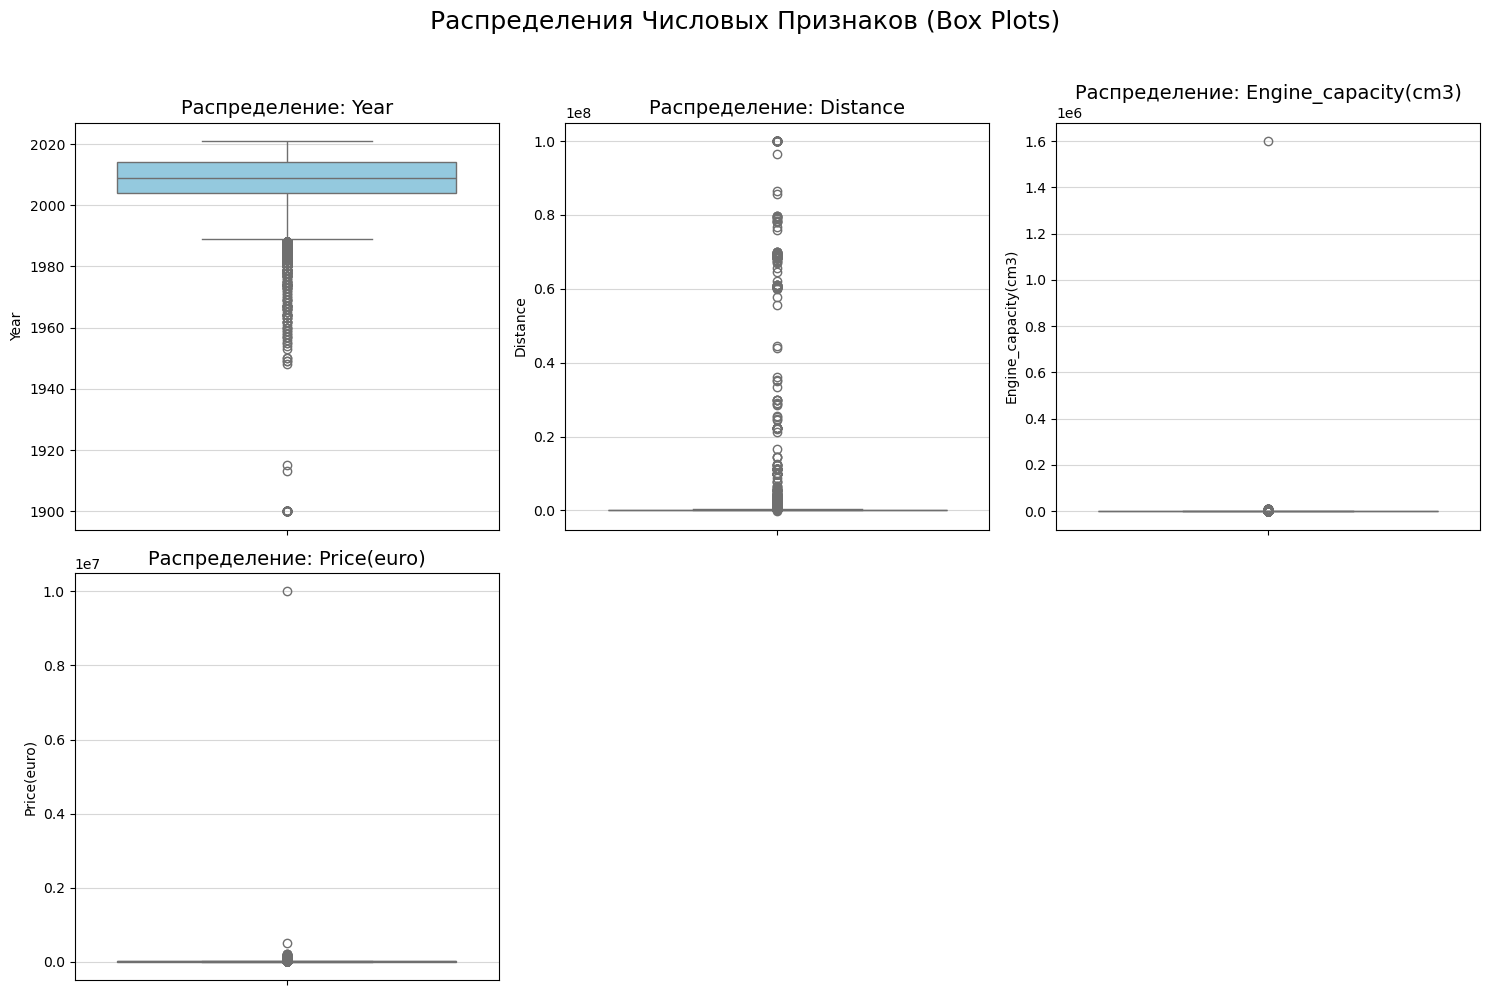

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедитесь, что num_df_cols содержит только числовые столбцы и существует в df
num_df_cols = df.select_dtypes(include=['number']).columns 

# Создаем цикл для построения Box Plot для каждого числового столбца
num_features = len(num_df_cols)
# Определяем размер фигуры: 3 столбца и соответствующее количество строк
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols 

plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Распределения Числовых Признаков (Box Plots)', fontsize=18, y=1.02)

for i, col in enumerate(num_df_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Строим Box Plot
    sns.boxplot(y=df[col], color='skyblue') 
    
    plt.title(f'Распределение: {col}', fontsize=14)
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 1.0]) # Автоматически корректируем расположение графиков
plt.show()

In [34]:
df[df['Distance']==0].value_counts()

Make        Model      Year    Style      Distance  Engine_capacity(cm3)  Fuel_type     Transmission  Price(euro)
Xpeng       G3         2020.0  SUV        0.0       0.0                   Electric      Automatic     26000.0        1
Alta marca  Alt model  2005.0  Sedan      0.0       1111.0                Petrol        Manual        1700.0         1
                       2020.0  Crossover  0.0       0.0                   Electric      Automatic     10000.0        1
                               Minivan    0.0       0.0                   Electric      Automatic     17500.0        1
                               SUV        0.0       0.0                   Electric      Automatic     10000.0        1
                                                                                                                    ..
Audi        80         1993.0  Sedan      0.0       200.0                 Metan/Propan  Manual        1000.0         1
                       1992.0  Sedan      0.0       2

(0.0, 10000000.0)

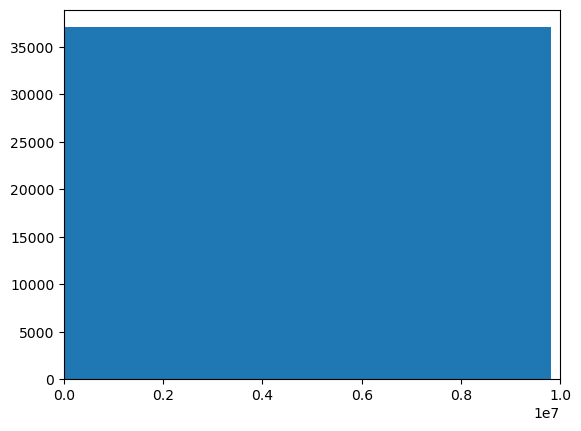

In [35]:
plt.hist(x=df['Distance'])
plt.xlim(0, 10000000)


Text(0.5, 1.0, 'Набор данных с дистансицей от 0 до 1e6')

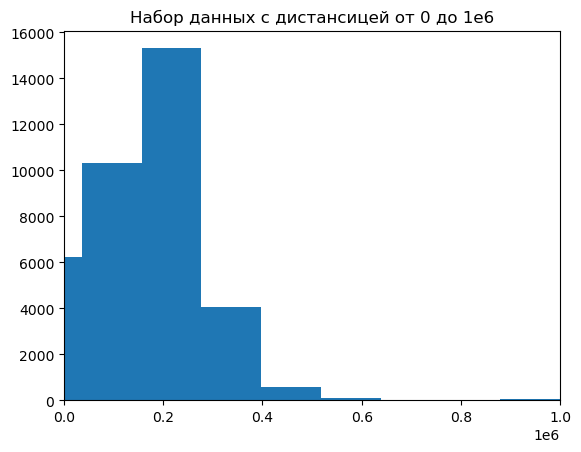

In [36]:
# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df_ex = df.drop(question_dist.index)
plt.hist(x=df_ex['Distance'])
plt.xlim(0,1e6)
plt.title("Набор данных с дистансицей от 0 до 1e6")

## Работа с аномалиями

Некоторые столбцы имеют аномалии. Работаем с каждым столбцом отдельно

In [37]:
# анализ гистограмм
question_dist = df[(df.Distance > 1e6) | (df.Distance <= 0)]
df = df.drop(question_dist.index)

question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

question_year = df[df.Year < 1980]
df = df.drop(question_year.index)

df.tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
37270,Land Rover,Freelander,2002.0,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37271,Dacia,Logan Mcv,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37272,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37273,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0
37274,Renault,Grand Scenic,2006.0,Minivan,300000.0,1500.0,Diesel,Manual,4000.0


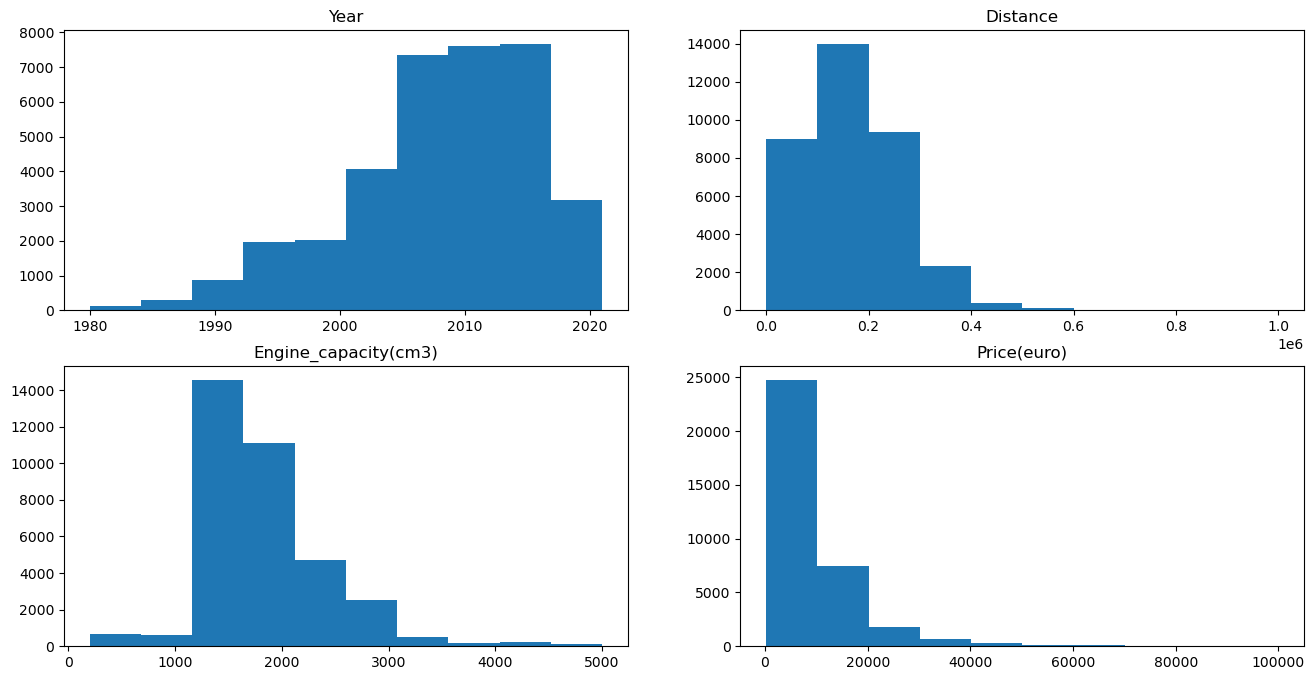

In [38]:
import numpy as np
import matplotlib.pyplot as plt

num_columns = df[num_df_cols].columns
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    plt.hist(x=df[column_name])
    plt.title(column_name)

## Проверка на пропуски

In [39]:
# Посмотрим на пропуски в числовых признаках
df[num_df_cols].isna().sum()

Year                    2
Distance                4
Engine_capacity(cm3)    2
Price(euro)             0
dtype: int64

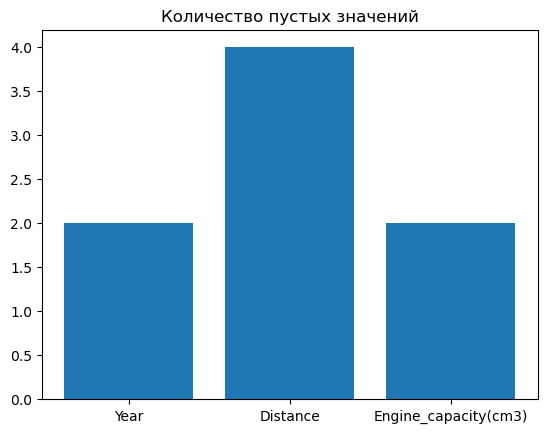

In [40]:
# Построим график с пропущенными данными для наглядности
import matplotlib.pyplot as plt

def null(df):
    h=df.isnull().sum()
    g=pd.DataFrame(data=h,columns=["null"])
    g=g[g['null']>0]
    plt.bar(g.index,g['null'])
    plt.title("Количество пустых значений")
    plt.show()

null(df[num_df_cols]) 

## Заполнение пропусков

In [41]:
# Посмотрим на пропуски в числовых признаках
df[num_df_cols].isna().sum()

Year                    2
Distance                4
Engine_capacity(cm3)    2
Price(euro)             0
dtype: int64

In [42]:
#отфильтруем пропущенные значения
mask1 = df['Year'].isnull()==True
df[mask1]

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
177,Fiat,Grande Punto,NaN,Hatchback,185000.0,1300.0,Diesel,Automatic,3600.0
197,Mercedes,Series (W123),NaN,Universal,100000.0,2400.0,Diesel,Manual,1000.0


Для года значений всего два. можно заменить на среднее. или поискать информацию и заполнить данные самим

In [43]:
# заменим пропуски средним значением
df[num_df_cols] = df[num_df_cols].fillna(value=df[num_df_cols].mean())

In [44]:
df[num_df_cols].isna().sum()

Year                    0
Distance                0
Engine_capacity(cm3)    0
Price(euro)             0
dtype: int64

## Добавление новых признаков

{'whiskers': [<matplotlib.lines.Line2D at 0x2432b3756d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2432b375450>,
 'boxes': [<matplotlib.lines.Line2D at 0x2432b377250>],
 'medians': [<matplotlib.lines.Line2D at 0x2432b374050>],
 'fliers': [<matplotlib.lines.Line2D at 0x2432b376710>],
 'means': []}

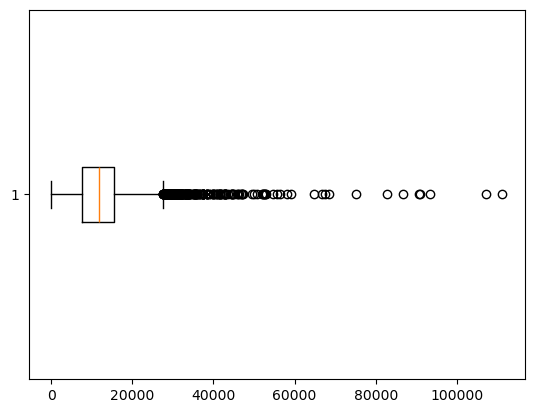

In [45]:
# Добавим новый признак - средний пробег в год (km_year)
df['km_year'] = df.Distance / (2024 - df.Year)
plt.boxplot(df.km_year, vert=False)

In [46]:
# удалим большие значения
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index) 
# удалим маленькие значения
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)

# переназначим индексы
df = df.reset_index(drop=True)

(array([3.220e+03, 7.281e+03, 1.210e+04, 6.916e+03, 2.044e+03, 4.590e+02,
        1.190e+02, 3.700e+01, 2.500e+01, 1.000e+01]),
 array([  100.,  5090., 10080., 15070., 20060., 25050., 30040., 35030.,
        40020., 45010., 50000.]),
 <BarContainer object of 10 artists>)

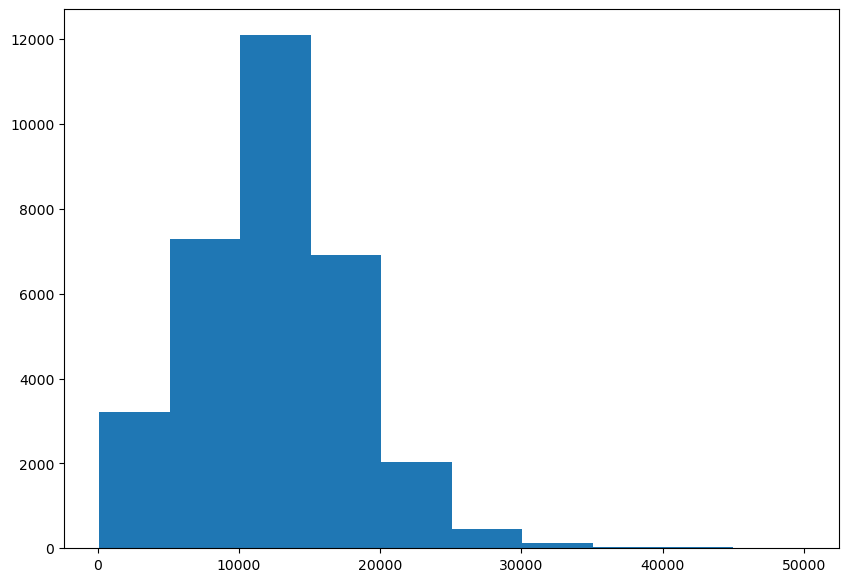

In [47]:
plt.figure(figsize=(10,7))
plt.hist(x = df['km_year'])

## Нормализация данных

In [48]:
df[num_df_cols].sample(3)

,Year,Distance,Engine_capacity(cm3),Price(euro)
10063,1995.0,220000.0,1800.0,3500.0
20898,2011.0,117000.0,1400.0,3499.0
25845,2005.0,315000.0,1600.0,1200.0


In [49]:
# Используем min/max нормализацию 
DF_norm_num_df  = df.copy() # чтобы не портить исходный датафрейм - складываем копию в новый датафрейм
Xmin = DF_norm_num_df[num_df_cols].min() # находим минимум (для каждого числового признака)
Xmax = DF_norm_num_df[num_df_cols].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF_norm_num_df = (DF_norm_num_df[num_df_cols] - Xmin)/( Xmax - Xmin) # реализуем нормализацию
                                        # ↑ из каждого стобца вычитаем свой минимум

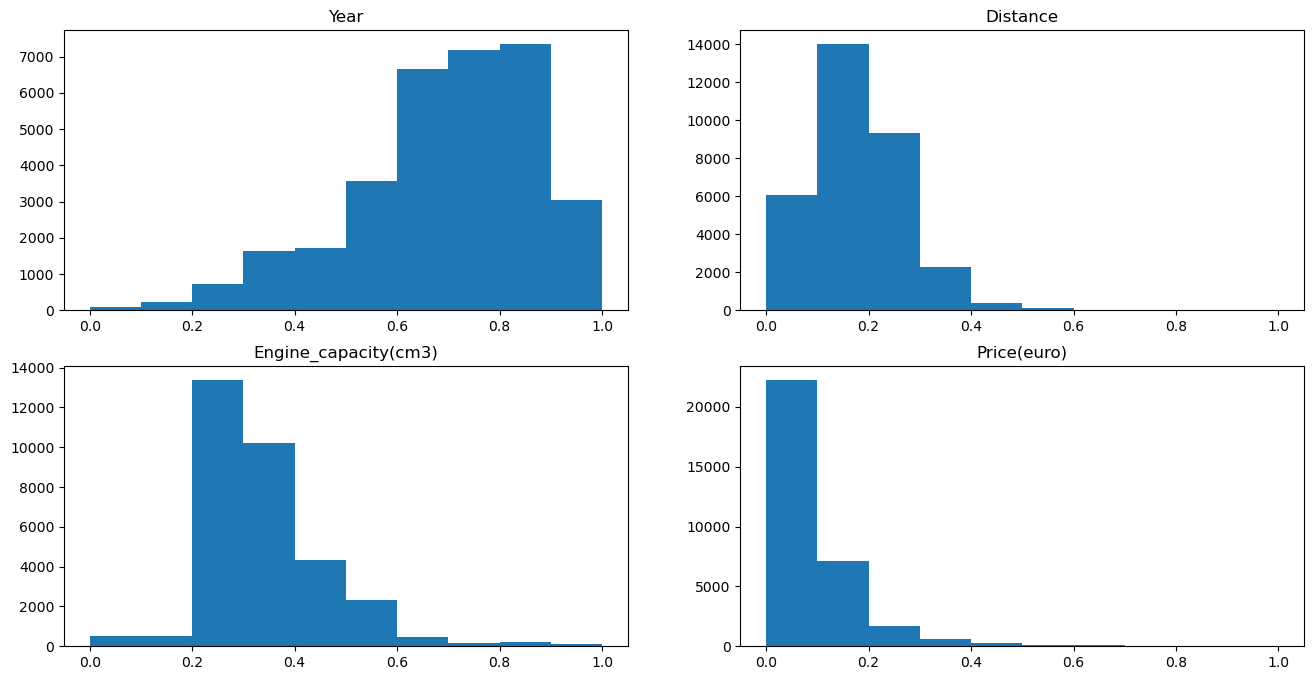

In [50]:
import numpy as np

num_columns = DF_norm_num_df.columns
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    plt.hist(x=DF_norm_num_df[column_name])
    plt.title(column_name)

## Стандартизация данных

In [51]:
df[num_df_cols].sample(3)

,Year,Distance,Engine_capacity(cm3),Price(euro)
19785,2013.0,126000.0,1599.0,9500.0
10266,1992.0,450000.0,1900.0,1850.0
28117,2008.0,178000.0,1600.0,3700.0


In [52]:
DF_scaled_num_df  = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
M = DF_scaled_num_df[num_df_cols].mean() # находим среднее (для каждого числового признака)
STD = DF_scaled_num_df[num_df_cols].std() # находим стандартное отклонение (для каждого числового признака)
DF_scaled_num_df = (DF_scaled_num_df-M)/STD # реализуем стандартизацию

Index(['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'], dtype='object')


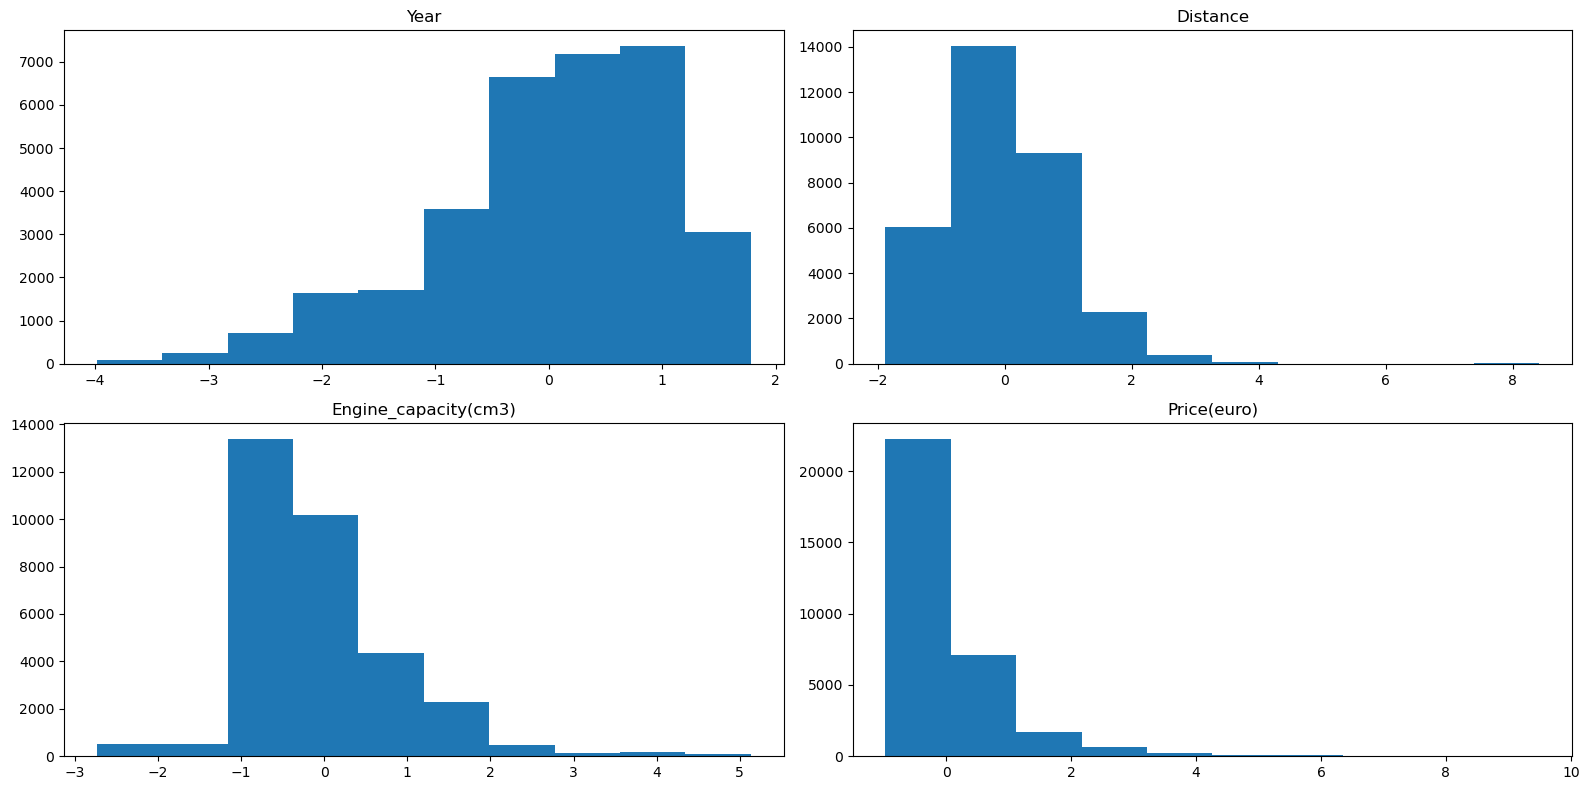

In [53]:
import numpy as np

num_columns = DF_norm_num_df.columns
print(num_columns)
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    plt.hist(x=DF_scaled_num_df[column_name])
    plt.title(column_name)

plt.tight_layout()

# Работа с категориальными данными

In [54]:
df[cat_df_cols].head()

,Make,Model,Style,Fuel_type,Transmission
0,Toyota,Prius,Hatchback,Hybrid,Automatic
1,Renault,Grand Scenic,Universal,Diesel,Manual
2,Renault,Laguna,Universal,Diesel,Manual
3,Opel,Astra,Universal,Metan/Propan,Manual
4,Mercedes,Vito,Microvan,Diesel,Manual


In [55]:
df[cat_df_cols].isna().sum()

Make            1
Model           3
Style           5
Fuel_type       3
Transmission    2
dtype: int64

In [56]:
df.fillna(value={'Make': 'Other',
                 'Model': 'Other', 
                 'Style': df.Style.mode(), 
                 'Fuel_type': df.Fuel_type.mode(), 
                 'Transmission ': df.Transmission.mode()
                }, inplace=True)

In [57]:
# кол-во уникальных значений
df[cat_df_cols].nunique()

Make             79
Model           778
Style            12
Fuel_type         6
Transmission      2
dtype: int64

In [58]:
# Посмотрим на столбец Make
counts = df.Make.value_counts() 
counts

Make
Volkswagen    3422
Toyota        3085
Mercedes      3020
BMW           2595
Renault       2345
              ... 
Groz             1
Tata             1
Zotye            1
Saturn           1
Pontiac          1
Name: count, Length: 79, dtype: int64

In [59]:
counts.median() # оцениваем медиану встречаемости разных признаков

32.0

In [60]:
counts[counts<100] # посмотрим на марки которые встречаются реже чем 100 раз

Make
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Lincoln             49
Dodge               49
Alfa Romeo          37
Smart               33
Ssangyong           32
GAZ                 29
Daihatsu            25
Moskvich / Izh      22
Chery               18
UAZ                 18
Lancia              17
Great Wall          17
Cadillac            16
Saab                15
Acura               14
Brilliance          14
Byd                 14
Alta marca          13
Zaz                 12
Lifan               10
Lada                 9
Isuzu                6
Buick                5
Ravon                5
LuAZ                 5
GMC                  5
Tesla                4
Maserati             4
Haima                3
Datsun               3
Hummer               3
Scion                3
Geely                3
Mercedes-Maybach     2
Faw                  2
ARO                  2
Other 

In [61]:
counts[counts<100].shape

(51,)

In [62]:
rare =  counts[(counts.values < 25)] # находим все редкие категории
df['Make'] = df['Make'].replace(rare.index.values, 'Rare') # заменим все редкие значения на "Rare"
                                # берем индексы, потому что в индексах rare скрыты редкие значения
                                # применяем values чтобы получился массив numpy
df.Make.value_counts() # пересчитаем сколько кого осталось

Make
Volkswagen    3422
Toyota        3085
Mercedes      3020
BMW           2595
Renault       2345
Opel          1823
Skoda         1734
Audi          1546
Dacia         1352
Ford          1343
Nissan        1252
Hyundai       1218
Honda          893
KIA            653
Mitsubishi     613
Lexus          597
Volvo          576
Vaz            452
Mazda          440
Peugeot        388
Chevrolet      323
Citroen        296
Land Rover     285
Rare           272
Seat           240
Porsche        190
Fiat           183
Suzuki         153
Subaru         150
Rover           92
Chrysler        83
Jeep            77
Mini            72
Infiniti        67
Jaguar          64
Daewoo          63
Dodge           49
Lincoln         49
Alfa Romeo      37
Smart           33
Ssangyong       32
GAZ             29
Daihatsu        25
Name: count, dtype: int64

In [63]:
# Обработаем признак Модель
counts = df.Model.value_counts()

counts

Model
E Class     1099
5 Series    1035
Passat       861
Megane       805
Astra        791
            ... 
Applouse       1
Equus          1
108            1
MX-6           1
620            1
Name: count, Length: 778, dtype: int64

In [64]:
counts.median()

9.0

In [65]:
counts[counts<100]

Model
Clio        98
X-Trail     93
Juke        88
Combo       88
A Class     87
            ..
Applouse     1
Equus        1
108          1
MX-6         1
620          1
Name: count, Length: 705, dtype: int64

<Axes: >

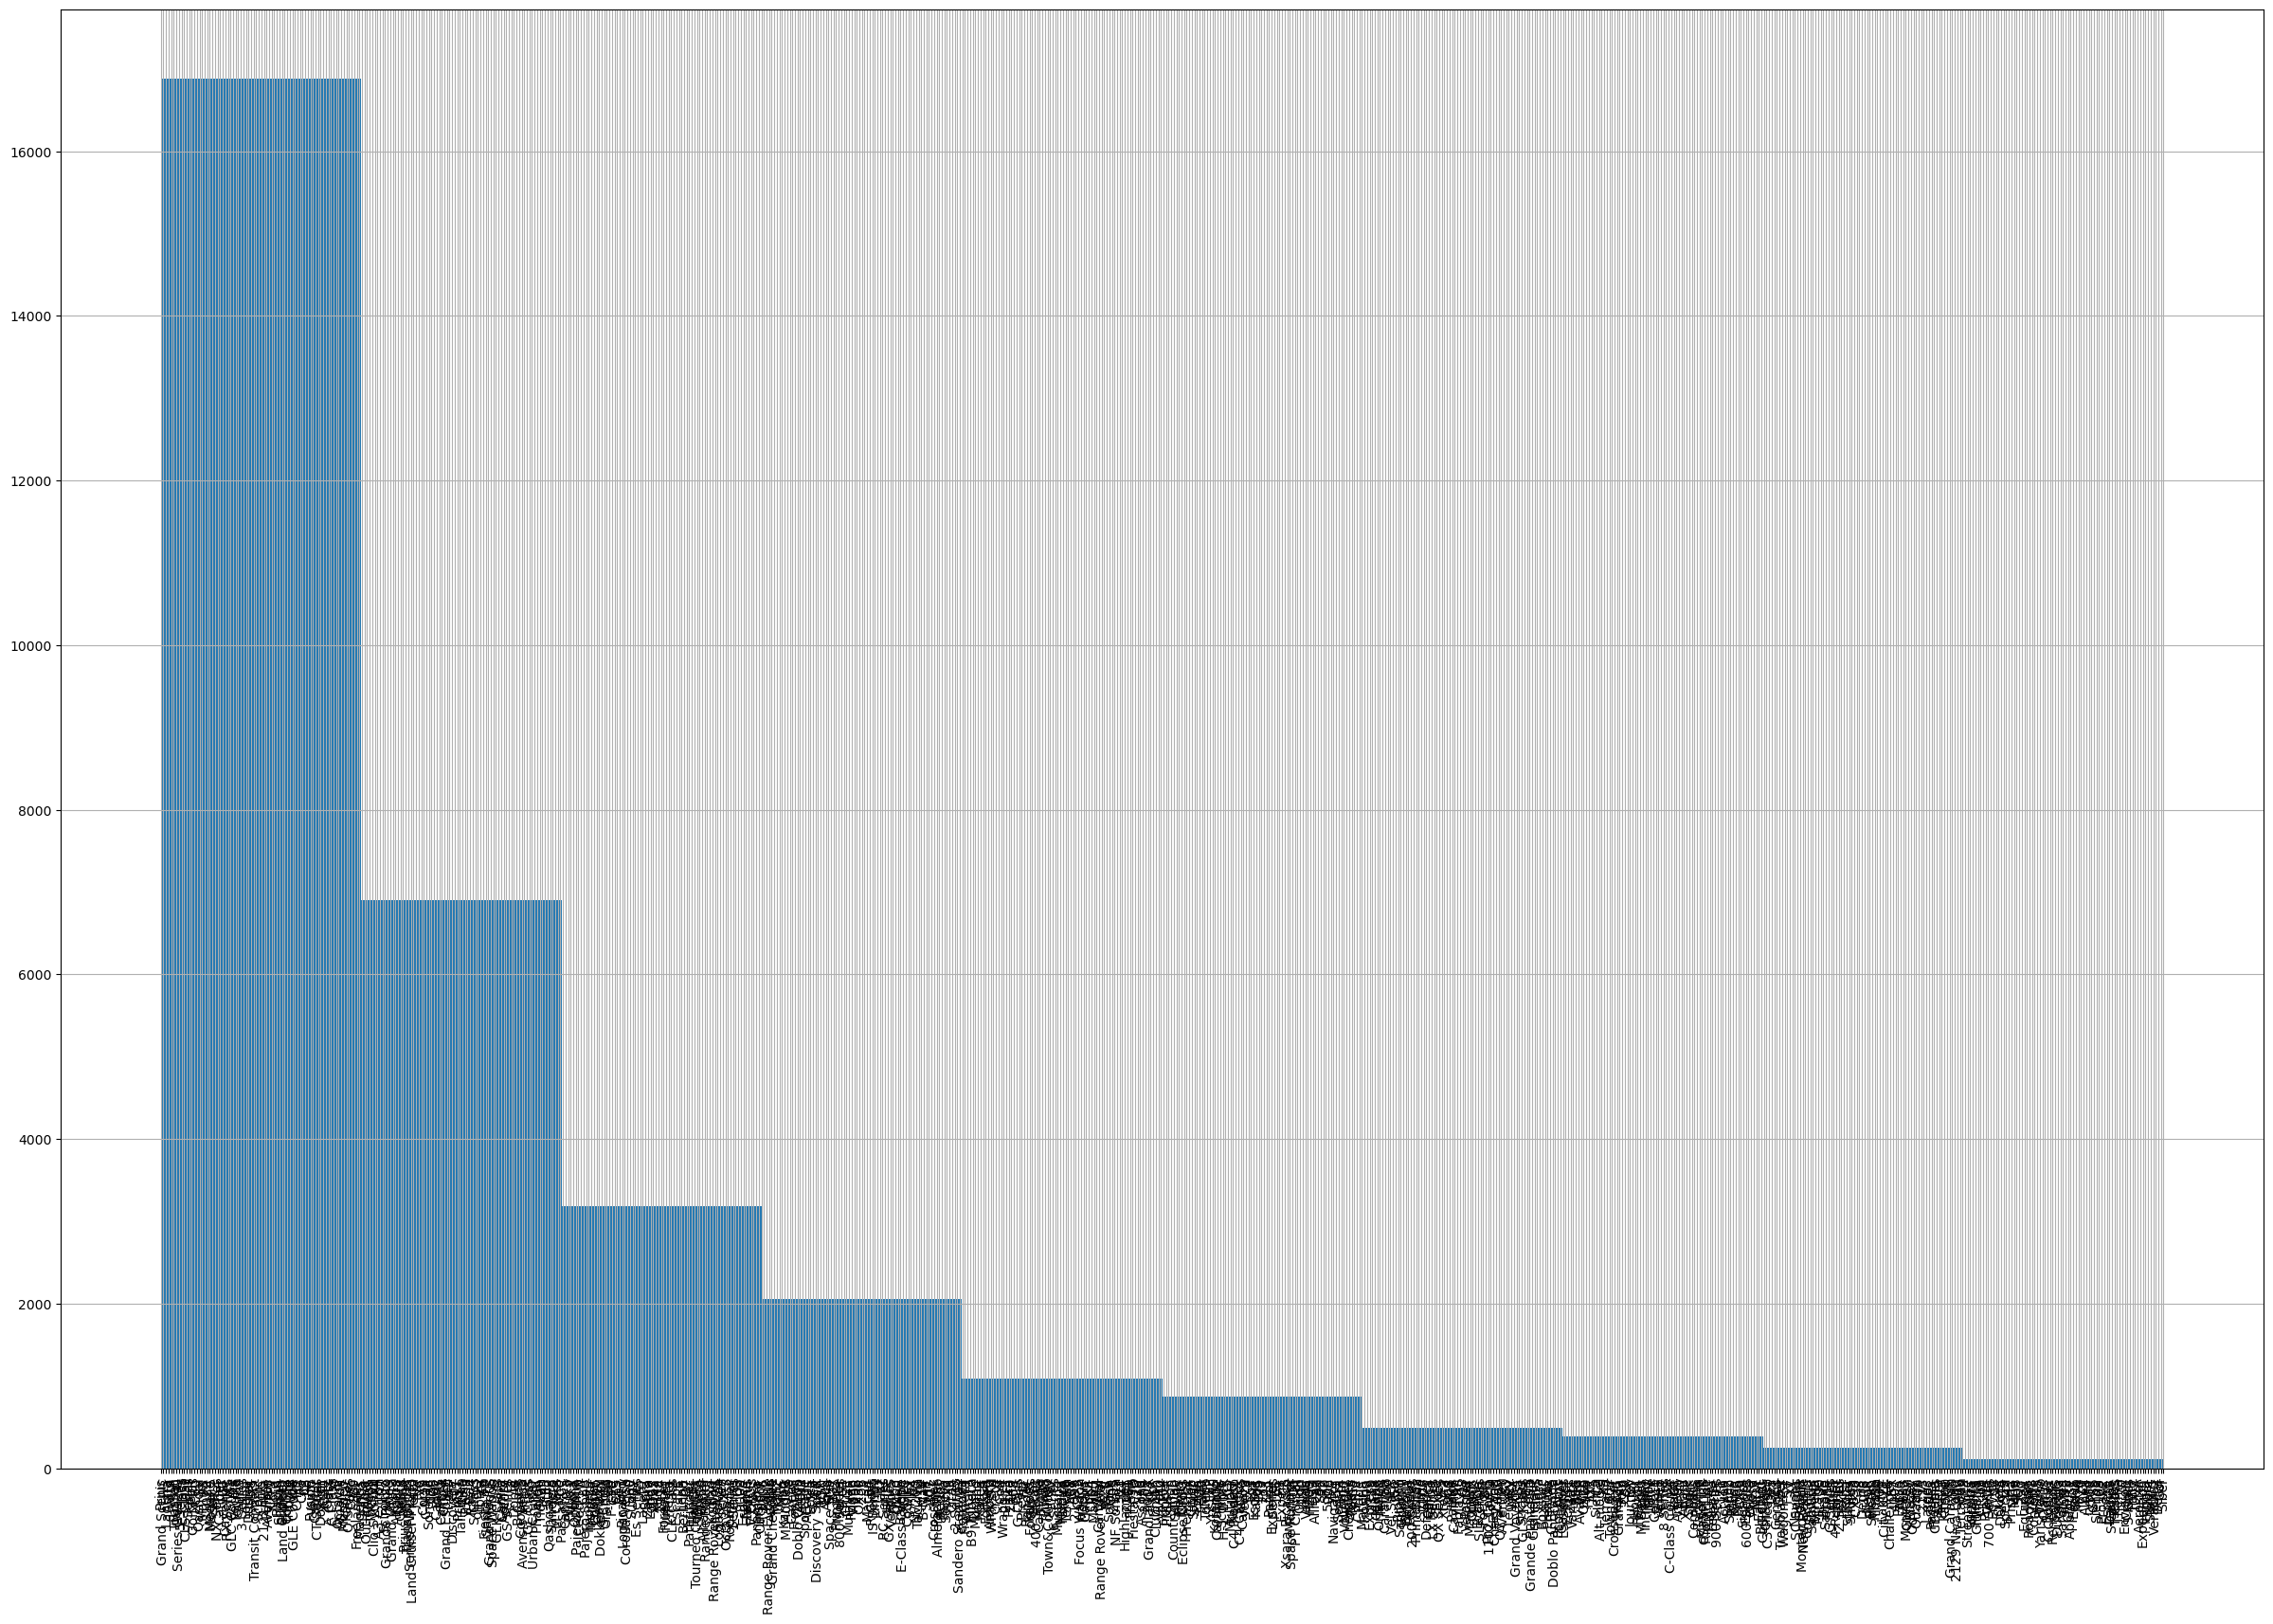

In [66]:
df.Model.hist(xrot=90, figsize=(30,20))

In [67]:
counts = df.Model.value_counts()
rare =  counts[(counts.values <  50)]
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
df.Model.value_counts()

Model
Rare             6587
E Class          1099
5 Series         1035
Passat            861
Megane            805
                 ... 
Urban Cruiser      52
GLC                52
Accent             51
Matrix             50
S60                50
Name: count, Length: 136, dtype: int64

<Axes: >

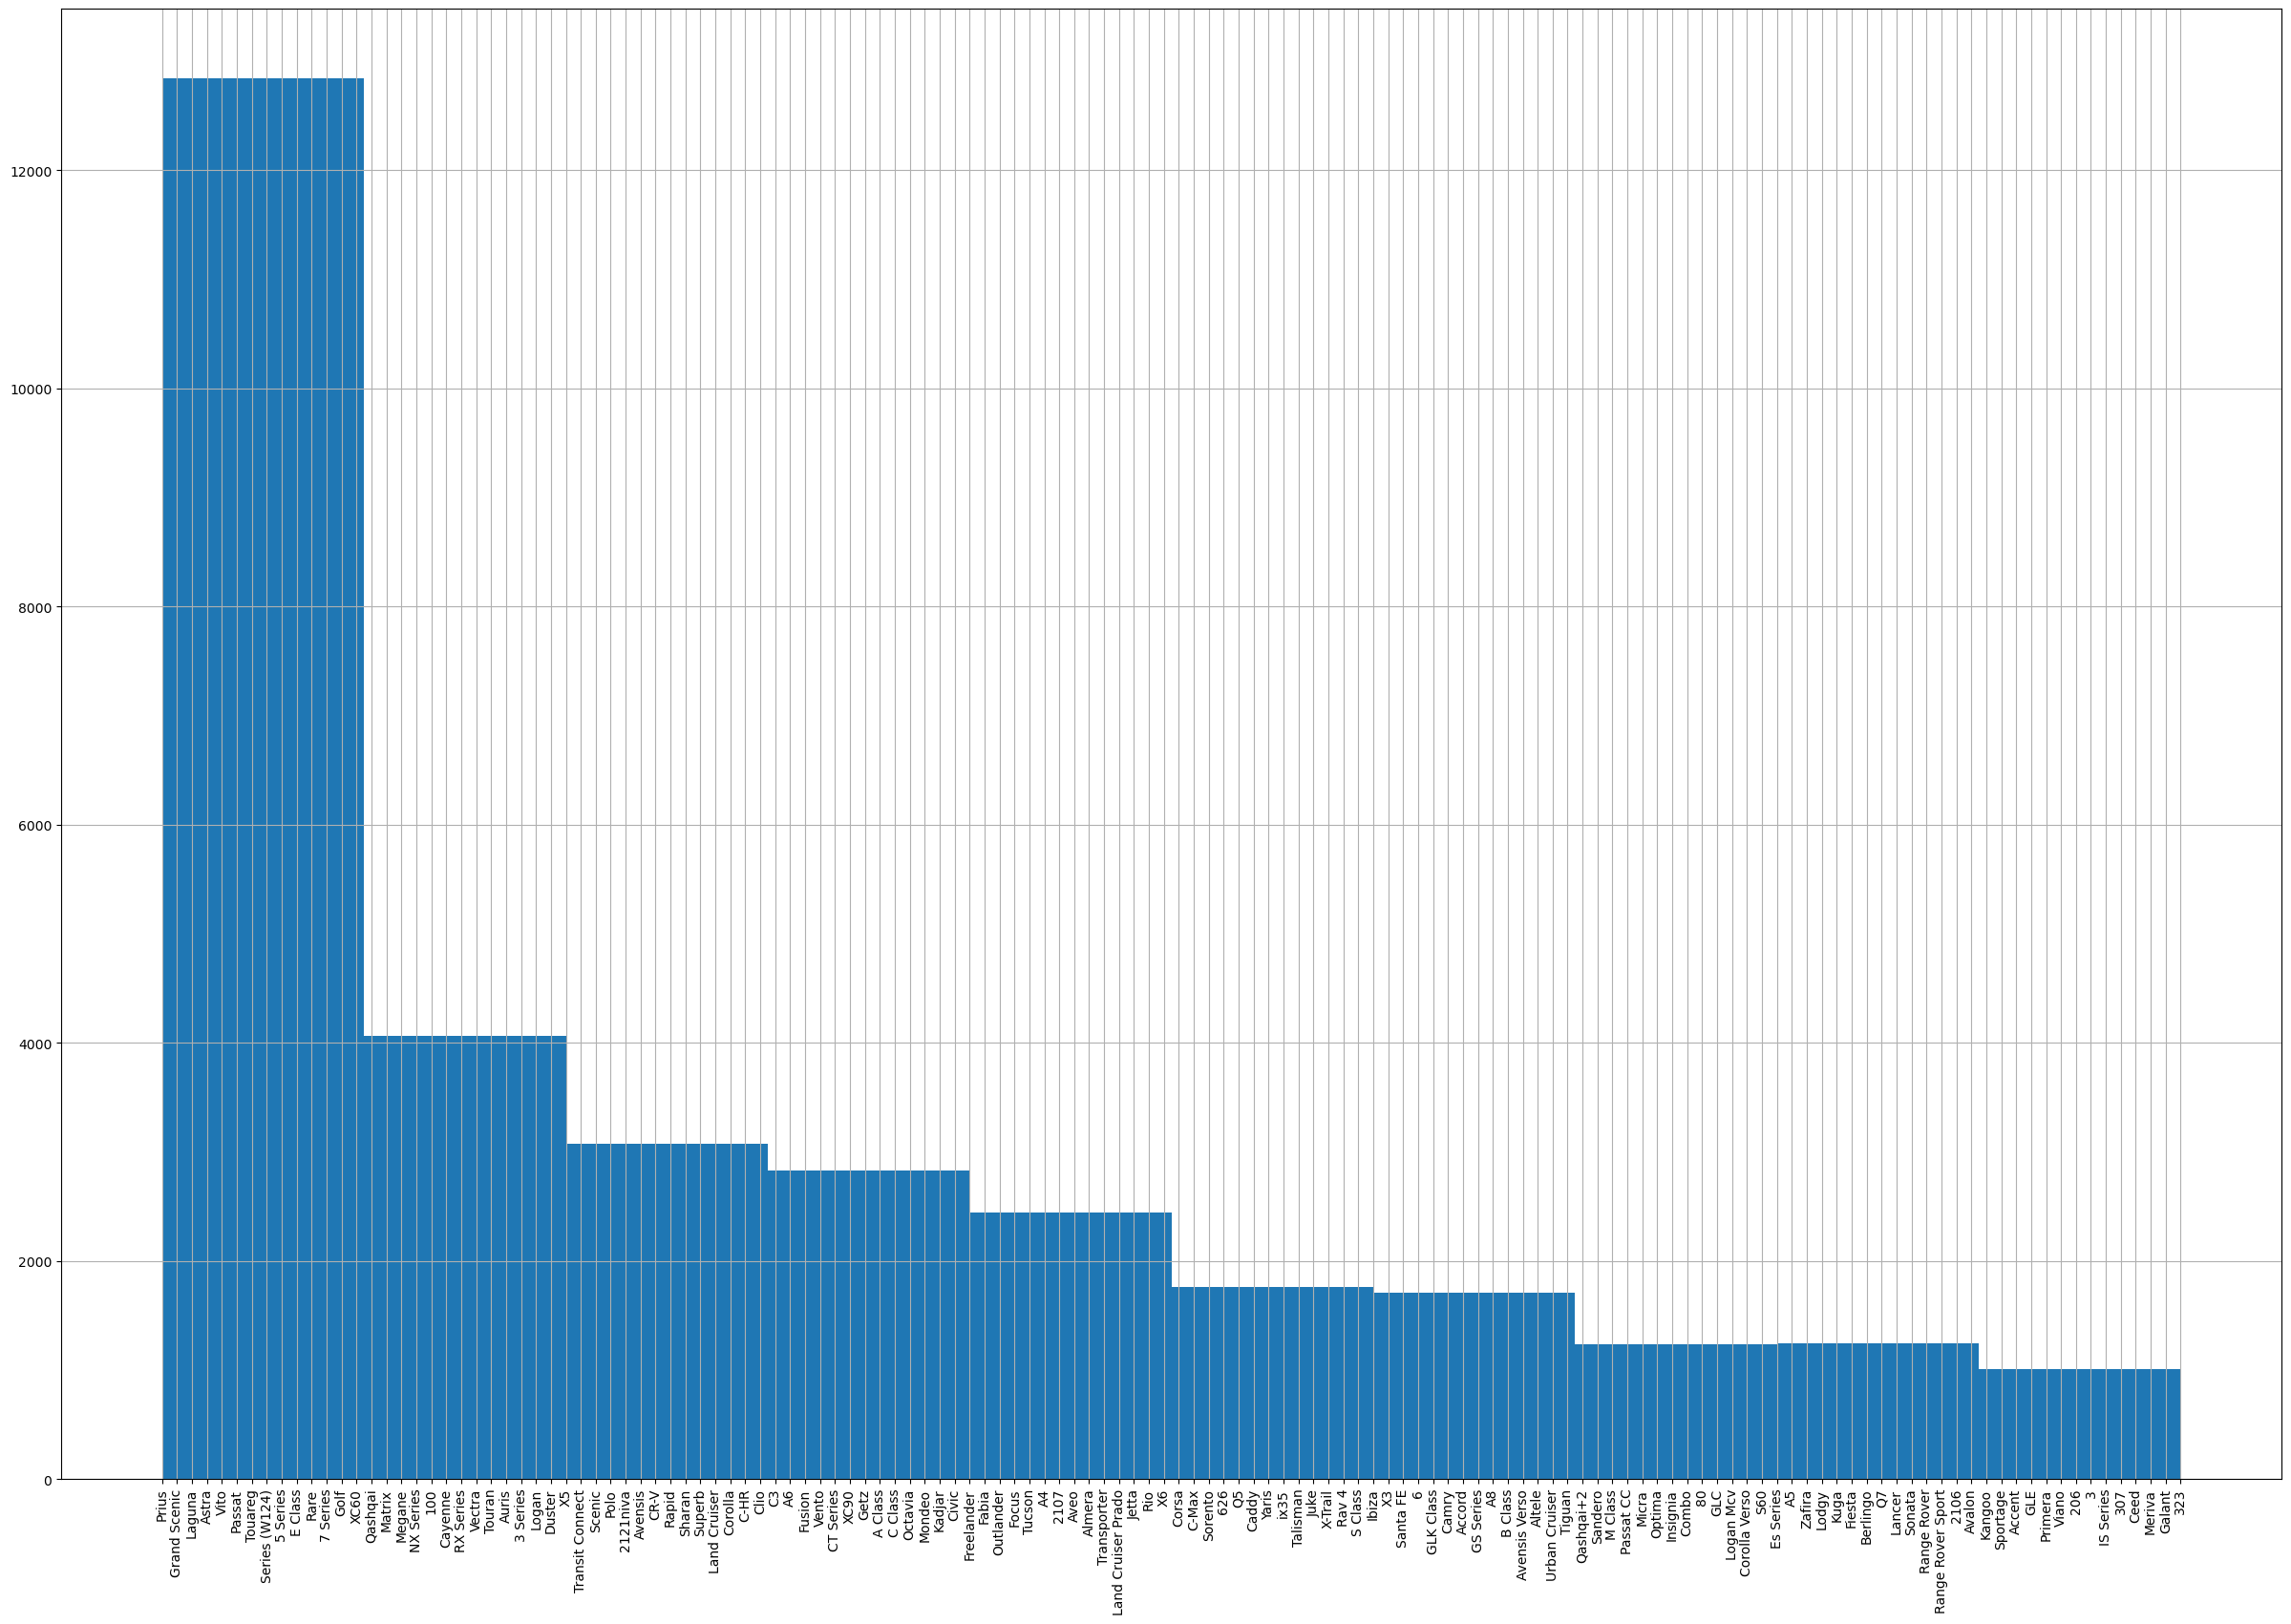

In [68]:
df.Model.hist(xrot=90, figsize=(30,20))

## Кодирование категориальных признаков

In [69]:
df[cat_df_cols].sample(3)

,Make,Model,Style,Fuel_type,Transmission
16115,Dacia,Logan Mcv,Universal,Petrol,Manual
23759,Toyota,Rav 4,Crossover,Petrol,Manual
10910,Skoda,Superb,Sedan,Diesel,Automatic


In [70]:
df.Transmission.unique()

array(['Automatic', 'Manual', nan], dtype=object)

In [71]:
df.Transmission.isnull().sum()

np.int64(2)

In [72]:
import pandas as pd 

df['Transmission_bin'] = pd.get_dummies(data=df['Transmission'],drop_first=True)
df.drop('Transmission',axis=1,inplace = True )
df['Transmission_bin'] = df['Transmission_bin'].astype('int64')
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Price(euro),km_year,Transmission_bin
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,7750.0,15000.000000,0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,8550.0,13500.000000,1
2,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,6550.0,9166.666667,1
3,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,4100.0,11111.111111,1
4,Mercedes,Vito,2000.0,Microvan,300000.0,2200.0,Diesel,3490.0,12500.000000,1


In [73]:
df.sample(3)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Price(euro),km_year,Transmission_bin
12667,Toyota,Avensis Verso,2001.0,Universal,290420.0,2000.0,Diesel,4750.0,12626.956522,1
21176,Alfa Romeo,Rare,2017.0,Sedan,6750.0,2900.0,Petrol,31000.0,964.285714,0
23488,Rover,Rare,1995.0,Sedan,284667.0,1997.0,Metan/Propan,2600.0,9816.103448,1


In [74]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe['Make'])
df_ohe = df_ohe.astype('int64')
df_ohe.tail()

,Alfa Romeo,Audi,BMW,Chevrolet,Chrysler,Citroen,Dacia,Daewoo,Daihatsu,Dodge,...,Seat,Skoda,Smart,Ssangyong,Subaru,Suzuki,Toyota,Vaz,Volkswagen,Volvo
32206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32208,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df.index

RangeIndex(start=0, stop=32211, step=1)

In [76]:
df_ohe.shape

(32211, 43)

In [77]:
DF_norm_num_df.index

RangeIndex(start=0, stop=32211, step=1)

In [78]:
df.Fuel_type.unique()

array(['Hybrid', 'Diesel', 'Metan/Propan', 'Petrol', 'Electric',
       'Plug-in Hybrid', nan], dtype=object)

## Итоговые наборы данных

In [ ]:
result_norm_df = pd.concat([DF_norm_num_df,df_ohe], axis=1)
result_norm_df.head()

,Year,Distance,Engine_capacity(cm3),Price(euro),Alfa Romeo,Audi,BMW,Chevrolet,Chrysler,Citroen,...,Seat,Skoda,Smart,Ssangyong,Subaru,Suzuki,Toyota,Vaz,Volkswagen,Volvo
0,0.756098,0.194758,0.333333,0.075651,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.829268,0.134740,0.270833,0.083667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.780488,0.109733,0.270833,0.063627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.634146,0.199760,0.291667,0.039078,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.487805,0.299790,0.416667,0.032966,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32206,0.878049,0.087726,0.333333,0.113226,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32207,0.536585,0.224767,0.333333,0.042084,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32208,0.853659,0.088727,0.270833,0.068136,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32209,0.634146,0.369811,0.375000,0.038076,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
